In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense,  Activation
import numpy as np



Using TensorFlow backend.


In [4]:
from scipy import io
import matplotlib.pyplot as plt
from skimage.transform import resize

In [5]:
dataset = io.loadmat('Data_hoda_full.mat')

In [8]:
X_train_orginal = np.squeeze(dataset['Data'][:1000])
y_train = np.squeeze(dataset['labels'][:1000])
X_test_original = np.squeeze(dataset['Data'][1000:1200])
y_test = np.squeeze(dataset['labels'][1000:1200])

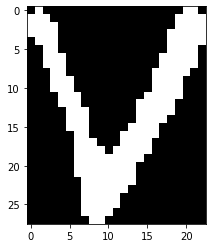

In [15]:
plt.imshow(X_train_orginal[65], cmap='gray')
plt.show()

In [6]:
X_train_5by5 = [resize(img, (5, 5)) for img in X_train_orginal]
X_test_5by_5 = [resize(img, (5, 5)) for img in X_test_original]

In [7]:
X_train = [x.reshape(25) for x in X_train_5by5]
X_test = [x.reshape(25) for x in X_test_5by_5]

In [10]:
print ("\tx_train.shape: {}".format(np.shape(X_train)))

	x_train.shape: (1000, 25)


In [11]:
# Preprocess input data for Keras. 
x_train = np.array(X_train)
y_train = keras.utils.to_categorical(y_train, num_classes=10)
x_test = np.array(X_test)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [19]:
print ("\tx_train.shape: {}".format(np.shape(x_train)))

	x_train.shape: (1000, 25)


In [17]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [18]:
print ("\tx_train.shape: {}".format(np.shape(x_train)))

	x_train.shape: (1000, 25)


In [20]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=25))
model.add(Dense(10, activation='softmax'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                1664      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 2,314
Trainable params: 2,314
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [30]:
model.fit(x_train, y_train,
          epochs=3000,
          batch_size=64, validation_split=0.2)

Train on 800 samples, validate on 200 samples
Epoch 1/3000
800/800 [==============================] - 0s 183us/step - loss: 1.2509 - accuracy: 0.6875 - val_loss: 1.2246 - val_accuracy: 0.6500
Epoch 2/3000
800/800 [==============================] - ETA: 0s - loss: 1.1787 - accuracy: 0.62 - 0s 58us/step - loss: 1.2487 - accuracy: 0.6900 - val_loss: 1.2267 - val_accuracy: 0.6550
Epoch 3/3000
800/800 [==============================] - 0s 61us/step - loss: 1.2460 - accuracy: 0.6862 - val_loss: 1.2191 - val_accuracy: 0.6500
Epoch 4/3000
800/800 [==============================] - 0s 70us/step - loss: 1.2434 - accuracy: 0.6825 - val_loss: 1.2167 - val_accuracy: 0.6550
Epoch 5/3000
800/800 [==============================] - 0s 58us/step - loss: 1.2411 - accuracy: 0.6963 - val_loss: 1.2202 - val_accuracy: 0.6550
Epoch 6/3000
800/800 [==============================] - 0s 66us/step - loss: 1.2389 - accuracy: 0.6875 - val_loss: 1.2128 - val_accuracy: 0.6600
Epoch 7/3000
800/800 [===================

In [31]:
loss, acc = model.evaluate(x_test, y_test)
print('\nTesting loss: %.2f, acc: %.2f%%'%(loss, acc))

200/200 [==============================] - 0s 35us/step

Testing loss: 0.22, acc: 0.92%
